# Import & read file section

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set_palette(sns.color_palette())
#reading data
md= pd.read_csv('who_suicide_statistics.csv') 

# View Information

In [3]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
md.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

# Handling Missing Information

In [4]:
md.isnull().values.any()

True

In [5]:
md.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [8]:
def fillmissing_suicide_no(table, col_name):
    table[col_name] = table[col_name].astype('float64')
    table[col_name].fillna(0, inplace=True)
fillmissing_suicide_no(md,'suicides_no')

def fillmissing_population(table, col_name):
    table[col_name] = table[col_name].astype('float64')
    table[col_name].fillna(table[col_name].mean(), inplace=True)
fillmissing_suicide_no(md,'population')

md.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

# Find Insights of Data

# year vs number of suicidal incidence based on gender 

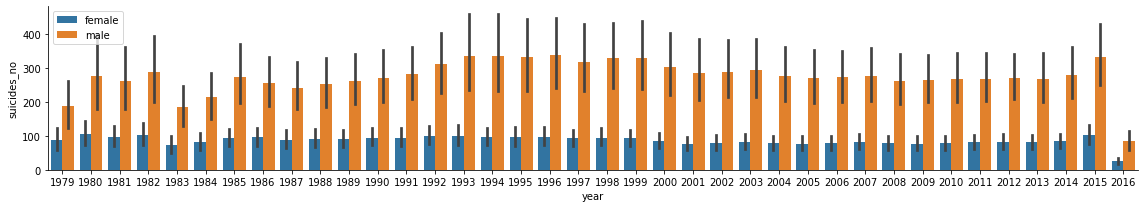

In [9]:
a=sns.catplot(x="year", y="suicides_no", hue="sex", data=md,kind="bar" ,height=3, aspect=16/3, legend=False) 
a.ax.legend(loc=2)

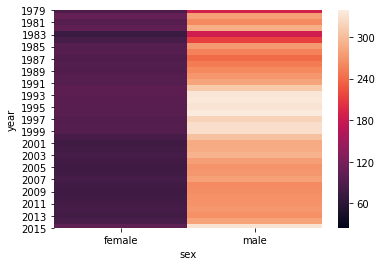

In [17]:
df_heatmap = md.pivot_table(values='suicides_no',index='year',columns='sex') #,aggfunc=np.mean
sns.heatmap(df_heatmap) #,annot=True
plt.show()

These insights can explain the comparative suicidal rate of Male & female from 1979 to 2016 in various country 

# Suicidal incidence based on age & correlation with gender

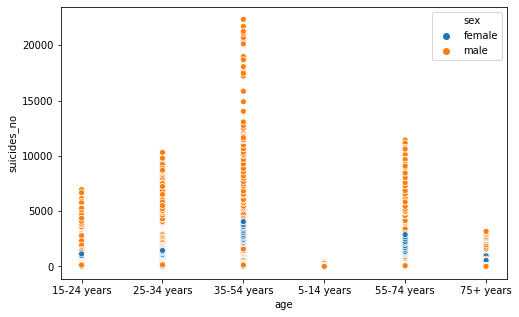

In [15]:
fig, ax= plt.subplots(figsize=(8,5))
sns.scatterplot(x="age", y="suicides_no",hue='sex' ,data=md )
plt.show()

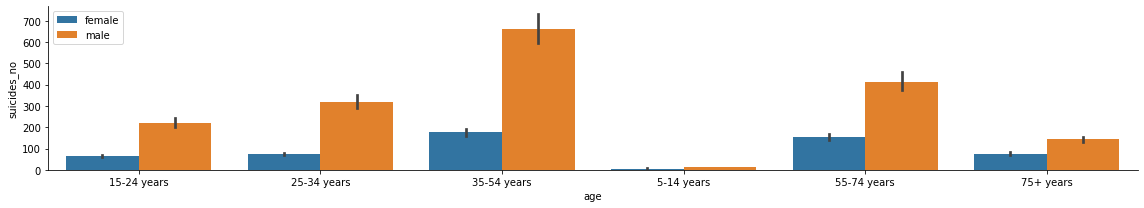

In [30]:
a=sns.catplot(x="age", y="suicides_no", hue="sex", data=md,kind="bar" ,height=3, aspect=16/3, legend=False) 
a.ax.legend(loc=2)

Age Groups are not sorted, we can sort it or use type conversion for using this group as value further 

In [31]:
#conversion
def age_conversion(a):
    if a=='5-14 years':
        return 1
    elif a=='15-24 years':
        return 2
    elif a=='25-34 years':
        return 3
    elif a=='35-54 years':
        return 4
    elif a=='55-74 years':
        return 5
    elif a=='75+ years':
        return 6

#applying conversion method    
md.age = md.age.apply(lambda x:age_conversion(x))

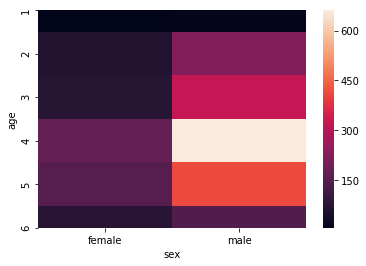

In [33]:
df_heatmap = md.pivot_table(values='suicides_no',index='age',columns='sex') #,aggfunc=np.mean
sns.heatmap(df_heatmap) #,annot=True
plt.show()

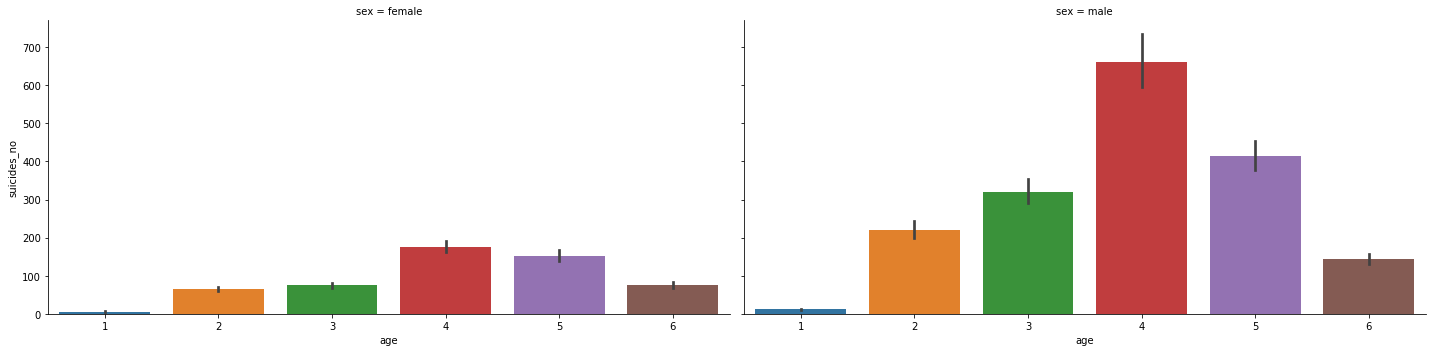

In [34]:
sns.catplot(x="age",y="suicides_no", col="sex", col_wrap=2,data=md,kind="bar", height=5, aspect=2)

This insight can explain the comparative suicidal rate of various age from 1979 to 2016 in various country. We can see the range 35 to 54 years has the highest rate & 5 to 14 has the lowest rate  of suicide.

# correlation between year & age

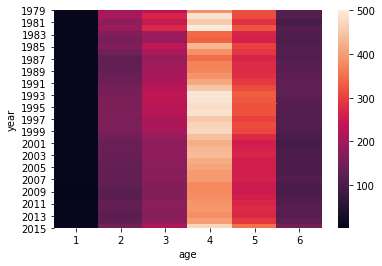

In [32]:
df_heatmap = md.pivot_table(values='suicides_no',index='year',columns='age') #,aggfunc=np.mean
sns.heatmap(df_heatmap) #,annot=True
plt.show()

# correlation between country & number of suicidal incidence

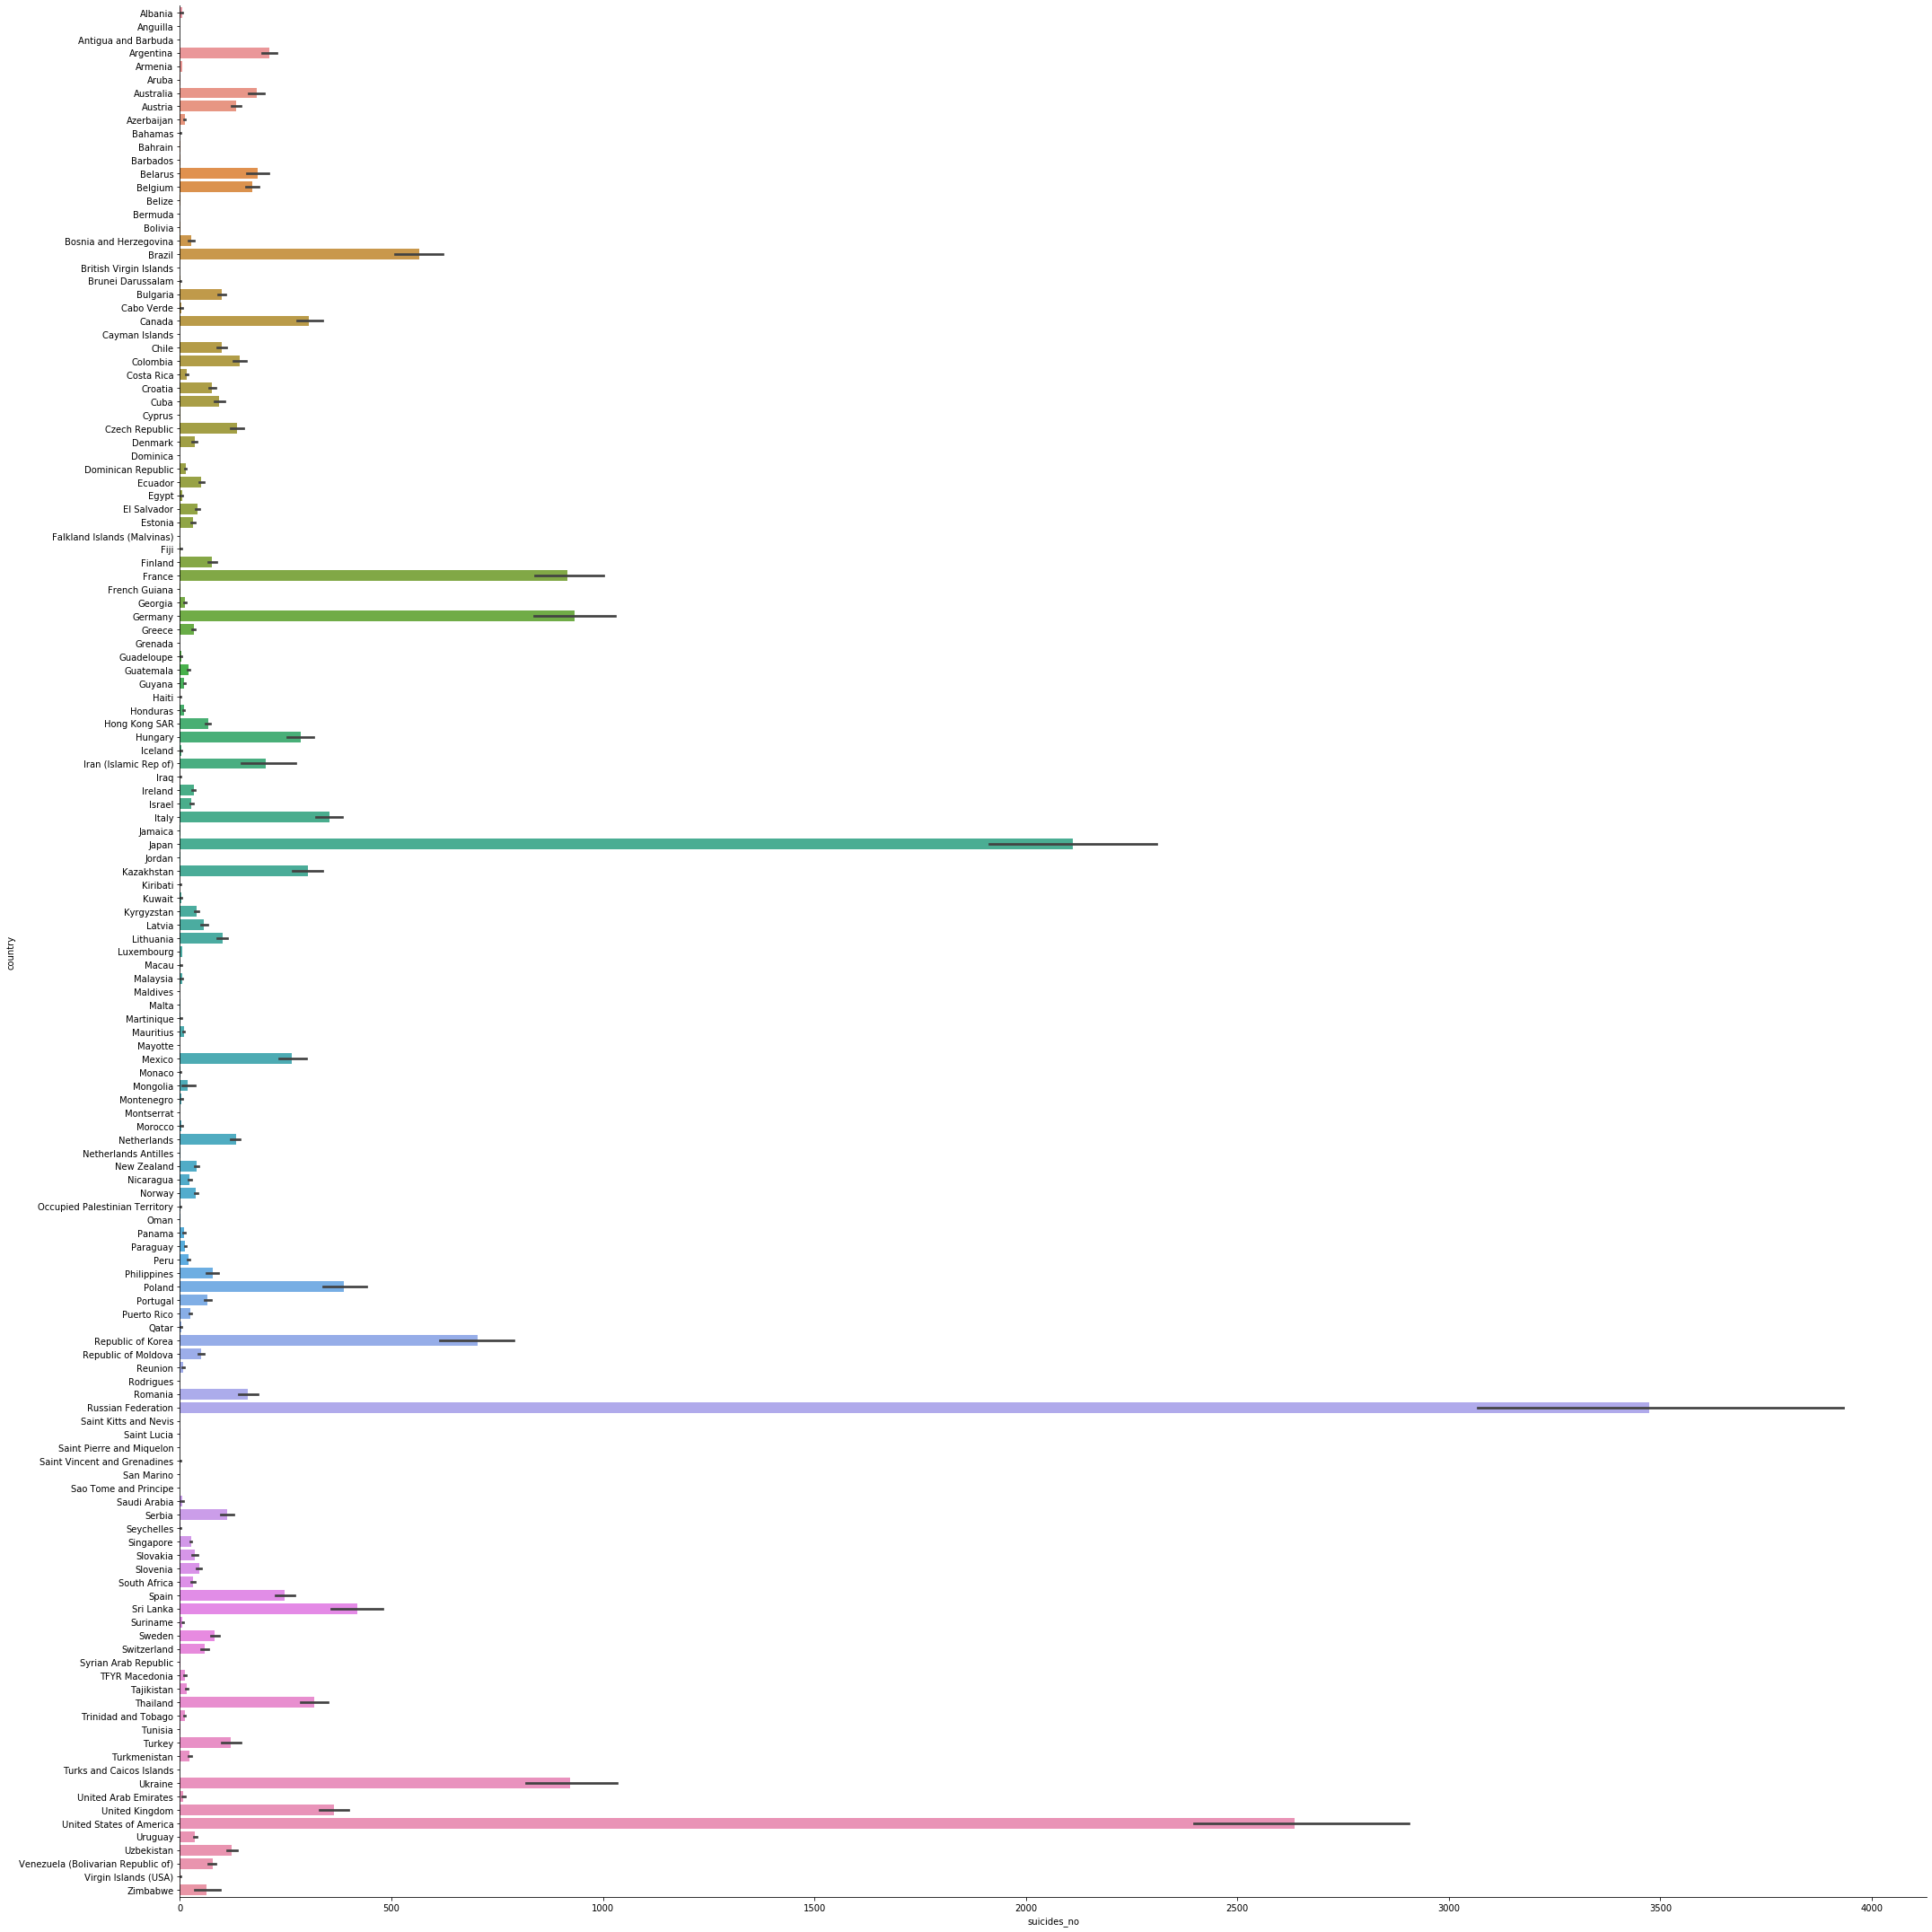

In [16]:
a=sns.catplot( x="suicides_no",y="country",data=md, kind="bar" ,height=30)

# Visualization of the linear relationship of total suicidal incidence per year all over the world

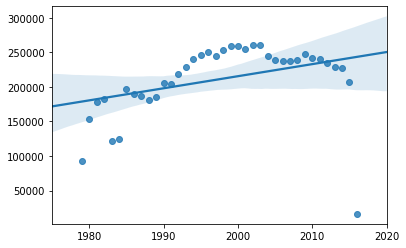

In [18]:
sn=md['suicides_no']
yr=md['year']
sx=md['sex']
rg=[]
yr3=[]
for i in range (0,38):
    rg.append(0)
for j in range (0, 43776):
    indx=int(yr[j])-1979
    rg[indx]= rg[indx]+ int(sn[j])

yr1=set(md['year'].values)
yr2=list(yr1)
sns.regplot(yr2, rg)
plt.show()